In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [23]:
# Load your dataset
# data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\SEM_5\\DMPA\\final_ds_proj.csv")
data = pd.read_csv("C:\\Users\\madhu\\OneDrive\\Desktop\\cleaned_data.csv")
data.sample (3)

,Unnamed: 0,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line_item_insurance
6554,8893,85072,104-CI-T30,FPQ-4187,SO-33490,DN-1526,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,...,240,4464,8570.88,1.92,0.01,"Aurobindo Unit III, India",True,1655,1211.48,16.80
2386,3613,29317,108-VN-T30,FPQ-12051,SCMS-188671,ASN-24431,Vietnam,PMO - US,Direct Drop,EXW,...,60,6000,13500.00,2.25,0.04,"Aurobindo Unit III, India",True,594,1113.01,16.70
2969,4447,44567,107-RW-T30,FPQ-10223,SCMS-152910,ASN-15894,Rwanda,PMO - US,Direct Drop,EXW,...,60,57961,130412.25,2.25,0.04,"Aurobindo Unit III, India",True,5525,43237.33,182.84


In [24]:
# Select features for anomaly detection
X = data[['pack price','line item value']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#  It transforms the features such that they have a mean of 0 and a standard deviation of 1

In [25]:
# Create a K-NN model ;
n_neighbors = 5
knn_model = NearestNeighbors(n_neighbors=n_neighbors)
knn_model.fit(X_scaled)

NearestNeighbors()

In [26]:
# Find distances to k-nearest neighbors ; & Calculate anomaly scores ;  Set a threshold to distinguish outliers
distances, _ = knn_model.kneighbors(X_scaled)

anomaly_scores = distances.mean(axis=1)

threshold = np.percentile(anomaly_scores, 99)

In [27]:

# Find the indices of the outliers based on the threshold
# outlier_indices = np.where(anomaly_scores > threshold)

# # Plot the k-nearest data points and outliers
# plt.figure(figsize=(9, 6))
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b', label='Data Points')  # Plot all data points
# plt.scatter(X_scaled[outlier_indices, 0], X_scaled[outlier_indices, 1], color='r', label='Outliers')  # Plot outliers in red
# plt.title('K-NN Anomaly Detection')
# plt.xlabel('pack price')
# plt.ylabel('line item value')
# plt.legend()
# plt.show()


In [28]:
# Identify outliers
outliers = data[anomaly_scores > threshold]

In [29]:
# # Visualize outliers using a scatter plot
# plt.figure(figsize=(10, 5))
# plt.subplot(2, 1, 1)
# plt.scatter(X['pack price'] ,X['line item value'], label='Inliers' )
# plt.scatter(outliers['pack price'], outliers['line item value'], color='red', label='Outliers')
# plt.xlabel('pack price')
# plt.ylabel('line item value')
# plt.title('Scatter Plot of Outliers')
# plt.legend()
# # plt.show(3)


In [30]:
# # Create a scatter plot with circles to represent nearest neighbors and anomalies
# plt.figure(figsize=(9, 6))

# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], label='Data Points')

# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=100, edgecolor='b', facecolor='none', label='Nearest Neighbors')

# plt.scatter(X_scaled[pack price, 0], X_scaled[line item value, 1], s=50, edgecolor='r', facecolor='white', label='Outliers')

# plt.title('K-NN Anomaly Detection with Nearest Neighbors and Outliers')
# plt.xlabel('pack price')
# plt.ylabel('line item value')
# plt.legend()

# plt.show()


In [31]:
print("Anomaly Scores Above Threshold:", outliers)

Anomaly Scores Above Threshold:       Unnamed: 0     id project code            pq #   po / so #  asn/dn #  \
66           112   1109   104-CI-T01  Pre-PQ Process  SCMS-42210  ASN-4086   
85           142   1299   107-RW-T01  Pre-PQ Process    SCMS-268   ASN-242   
97           161   1519   108-VN-T01  Pre-PQ Process  SCMS-14170  ASN-1439   
169          286   2685   110-ZM-T01  Pre-PQ Process    SCMS-163   ASN-123   
243          416   3956   108-VN-T01  Pre-PQ Process    SCMS-171   ASN-294   
...          ...    ...          ...             ...         ...       ...   
5642        7928  83910   151-NG-T30       FPQ-14989    SO-49933   DN-4229   
5968        8274  84302   110-ZM-T30       FPQ-12087    SO-45100   DN-3396   
6397        8726  84837   151-NG-T30       FPQ-11771    SO-44757   DN-3251   
6948        9312  85573   151-NG-T30       FPQ-14766    SO-49700   DN-4186   
7646       10077  86480   151-NG-T30        FPQ-9432    SO-42333   DN-2688   

            country managed by 

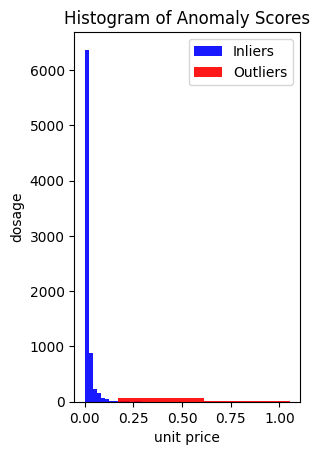

In [32]:
X = data[['unit price', 'dosage']]
# Visualize outliers using a histogram
plt.subplot(1, 2, 2)
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='Inliers')
plt.hist(anomaly_scores[anomaly_scores > threshold], bins=2, color='red', alpha=0.9, label='Outliers')
plt.xlabel('unit price')
plt.ylabel('dosage')
plt.title('Histogram of Anomaly Scores')
plt.legend()

Anomaly Scores Above Threshold: [0.21941771 0.35501109 0.77809437 0.34459658 0.62020596 0.21452745
 0.2737354  0.70679701 1.03914366 0.49914031 0.79232153 0.25606341
 0.18441564 0.22030465 0.41280457 0.21624149 0.18115838 0.27674917
 0.57950873 0.3995014  0.28581597 0.39852522 0.26812429 0.17606673
 0.18203363 0.62275085 0.26707798 0.88058546 0.22553925 0.21342539
 0.43681691 0.18999864 0.36804336 0.22553925 0.49761058 0.27581713
 0.27627538 0.43159175 0.19934154 0.61446221 0.26482789 0.2025678
 0.88328484 0.46413106 0.17559602 0.2670067  0.97745566 0.27138792
 0.23612645 0.88353691 0.21109891 0.17573753 0.17473623 0.52008197
 0.21855361 1.05098465 0.21897618 0.16973706 0.18508317 0.44689045
 1.05250467 0.30646983 0.21538971 0.17202929 0.19925743 0.23055165
 0.22529765 0.24580689 0.1860935  0.24402018 0.18916034 0.26031449
 0.38806625 0.26562044 0.20416564 0.18737028 0.19082368 0.22114663
 0.17647951]


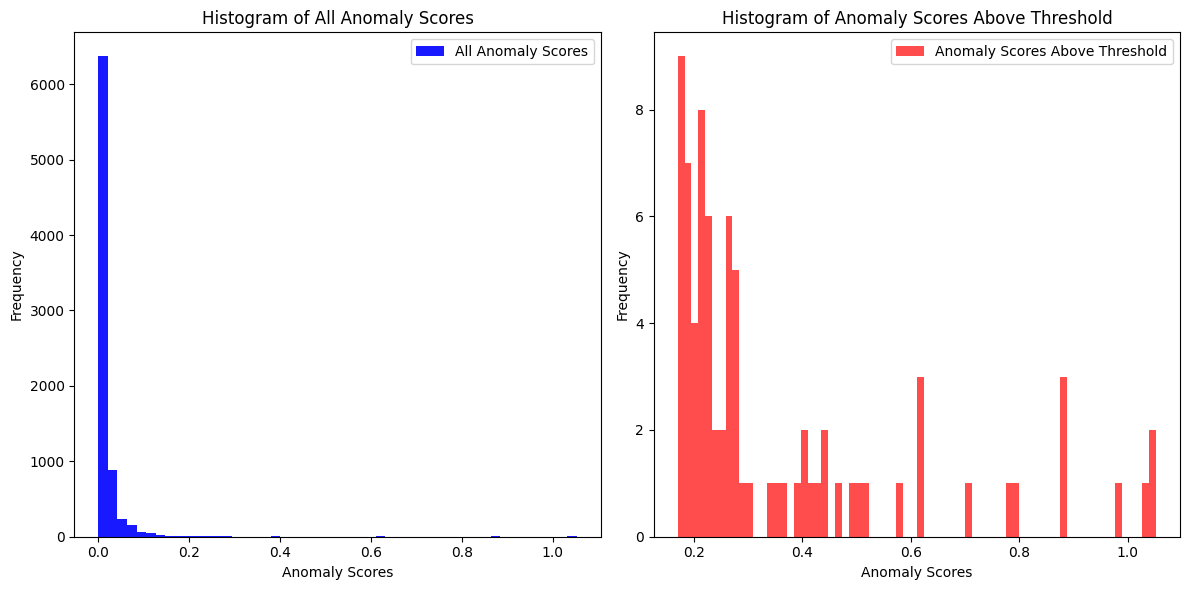

In [33]:
print("Anomaly Scores Above Threshold:", anomaly_scores[anomaly_scores > threshold])

# Create a figure and subplot for the histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.9, label='All Anomaly Scores')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of All Anomaly Scores')
plt.legend()

plt.subplot(1, 2, 2)

plt.hist(anomaly_scores[anomaly_scores > threshold], bins=70, color='red', alpha=0.7, label='Anomaly Scores Above Threshold')

plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores Above Threshold')
plt.legend()

plt.tight_layout()
plt.show()


In [34]:

# Example: Box plot for 'id'
# Data points above the upper/below whisker are potential upper/lower outliers. [1.5 times the IQR]
# plt.boxplot(data['id'], vert=False)
# plt.xlabel('id')
# plt.title('Box Plot for id')
# plt.show()


Text(0.5, 1.0, '')

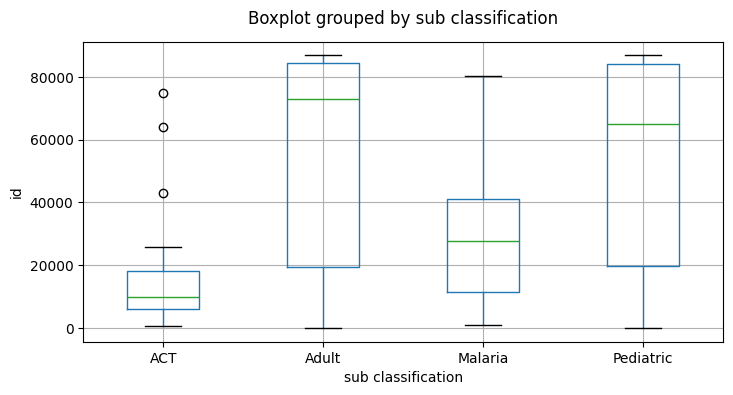

In [35]:
ax=data.boxplot(column="id", by="sub classification",figsize=(8,4))
ax.set_ylabel("id")
ax.set_title("")

Anomalies in 'sub classification':
     sub classification     id
66                Adult   1109
85                Adult   1299
97                Adult   1519
169               Adult   2685
243               Adult   3956
...                 ...    ...
5642              Adult  83910
5968              Adult  84302
6397              Adult  84837
6948              Adult  85573
7646              Adult  86480

[79 rows x 2 columns]


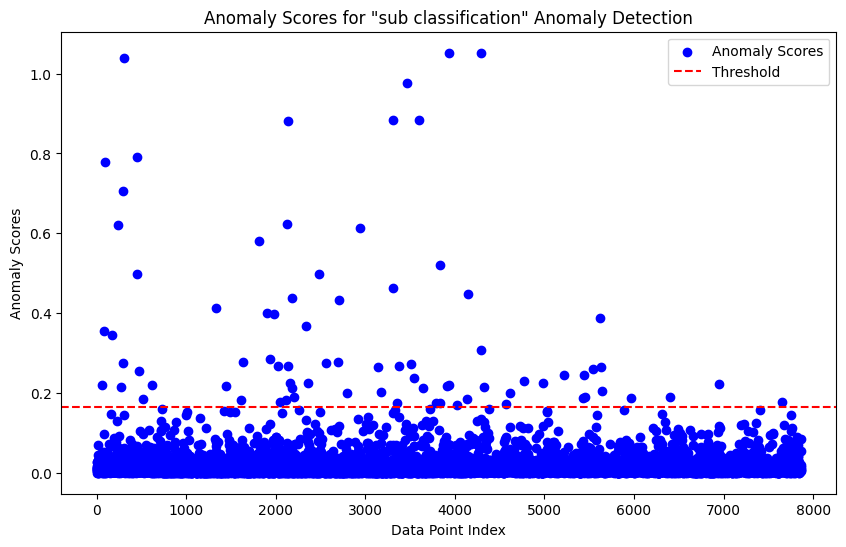

In [36]:
anomaly_scores = distances.mean(axis=1)
#  99th percentile
threshold = np.percentile(anomaly_scores, 99)

anomalies = data[anomaly_scores > threshold]

print("Anomalies in 'sub classification':")
print(anomalies[['sub classification', 'id']])

plt.figure(figsize=(10, 6))
plt.scatter(data.index, anomaly_scores, c='b', label='Anomaly Scores')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Scores')
plt.title('Anomaly Scores for "sub classification" Anomaly Detection')
plt.legend()
plt.show()